In [2]:
import numpy as np
import pandas as pd

In [3]:
pdf = pd.read_csv('combined_dataframes.csv')
pdf.head()

C:\Users\arpan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,loan_id,mon_rep_dt,UPB_x,default_status,loan_age,credit_score,1st_pay_dt,1st_home,maturity_dt,...,channel,prod_type,state,home_type,zip_code,purpose,loan_term,no_borrowers,seller,servicer
0,0,F115Q1000001,201610,0.00,0,18,796,201505,9,203004,...,R,FRM,IA,SF,51000,C,180,1,Other sellers,Other servicers
1,1,F115Q1000002,201709,100534.98,0,30,805,201504,9,204503,...,B,FRM,NE,SF,68500,N,360,1,Other sellers,Other servicers
2,2,F115Q1000003,201709,320369.23,0,31,730,201503,9,203002,...,R,FRM,KY,SF,40400,N,180,2,Other sellers,NATIONSTARMTGELLCDBA
3,3,F115Q1000004,201709,281120.77,0,29,762,201505,9,204504,...,R,FRM,CO,SF,81200,N,360,2,Other sellers,USBANKNA
4,4,F115Q1000005,201709,183054.42,0,29,777,201505,9,204504,...,R,FRM,IL,SF,61700,N,360,1,Other sellers,Other servicers


In [4]:
pdf = pdf.drop(['Unnamed: 0'], axis=1)
pdf.head()

,loan_id,mon_rep_dt,UPB_x,default_status,loan_age,credit_score,1st_pay_dt,1st_home,maturity_dt,MI%,...,channel,prod_type,state,home_type,zip_code,purpose,loan_term,no_borrowers,seller,servicer
0,F115Q1000001,201610,0.00,0,18,796,201505,9,203004,0,...,R,FRM,IA,SF,51000,C,180,1,Other sellers,Other servicers
1,F115Q1000002,201709,100534.98,0,30,805,201504,9,204503,0,...,B,FRM,NE,SF,68500,N,360,1,Other sellers,Other servicers
2,F115Q1000003,201709,320369.23,0,31,730,201503,9,203002,0,...,R,FRM,KY,SF,40400,N,180,2,Other sellers,NATIONSTARMTGELLCDBA
3,F115Q1000004,201709,281120.77,0,29,762,201505,9,204504,0,...,R,FRM,CO,SF,81200,N,360,2,Other sellers,USBANKNA
4,F115Q1000005,201709,183054.42,0,29,777,201505,9,204504,0,...,R,FRM,IL,SF,61700,N,360,1,Other sellers,Other servicers


In [5]:
len(pdf)

3115090

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(pdf)

Number of variables,27
Number of observations,3115090
Total Missing (%),0.0%
Total size in memory,641.7 MiB
Average record size in memory,216.0 B
Numeric,13
Categorical,9
Boolean,1
Date,0
Text (Unique),1
Rejected,3


# Removing Outliers

In [7]:
# First looking at box plots of single numeric feature

import seaborn as sns
sns.boxplot(x=pdf['CLTV'])

### We will remove outliers using the z-score method for the following 'numeric' variables

In [8]:
from scipy import stats

z = np.abs(stats.zscore(pdf['CLTV']))
# print(z)

In [9]:
new_pdf = pdf[(z < 3)]
# new_pdf.head()

In [10]:
z1 = np.abs(stats.zscore(new_pdf['DTI']))
npdf1 = new_pdf[(z1 < 3)]

In [11]:
z2 = np.abs(stats.zscore(npdf1['MI%']))
npdf2 = npdf1[(z2 < 3)]

In [12]:
z3 = np.abs(stats.zscore(npdf2['UPB_y']))
npdf3 = npdf2[(z3 < 3)]

In [13]:
z4 = np.abs(stats.zscore(npdf3['credit_score']))
npdf4 = npdf3[(z4 < 3)]

In [14]:
z5 = np.abs(stats.zscore(npdf4['interest']))
npdf5 = npdf4[(z5 < 3)]

In [15]:
z6 = np.abs(stats.zscore(npdf5['loan_age']))
npdf6 = npdf5[(z6 < 3)]

In [16]:
z7 = np.abs(stats.zscore(npdf6['num_units']))
npdf7 = npdf6[(z7 < 3)]

In [17]:
# length of the resulting dataframe after removing all above outliers
len(npdf7)

2995371

In [18]:
len(new_pdf)

3091616

### For the following analysis purposes, we will consider the original dataset

### How many have defaulted?

In [19]:
count_1 = npdf7.loc[npdf7['default_status'] == '1']
len(count_1)

9305

### How many have good credit score?
#### According to credit karma, a score of 700 and above is generally considered good. So let's look at how many users have a good score and how many poor.

In [20]:
good_score = npdf7.loc[npdf7['credit_score'] >= 700]
len(good_score)

2545791

In [21]:
poor_score = npdf7.loc[npdf7['credit_score'] <= 700]
len(poor_score)

464685

### Proportion of good score

In [22]:
len(good_score)/len(npdf7)

0.8499084086745848

#### 85% of the applicants have a good score

## Let's look at some interesting Trends!

In [23]:
# first importing required modules
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline


# Seaborn for plotting and styling
import seaborn as sns

In [28]:
# # Scatterplot arguments
# sns.lmplot(x='Attack', y='Defense', data=df,
#            fit_reg=False, # No regression line
#            hue='Stage')   # Color by evolution stage

### Bar Plots

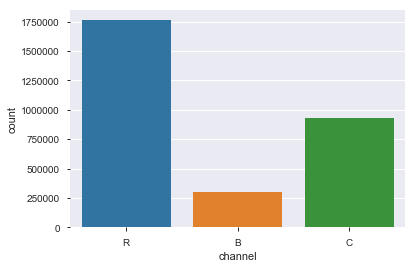

In [29]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='channel', data=npdf7)

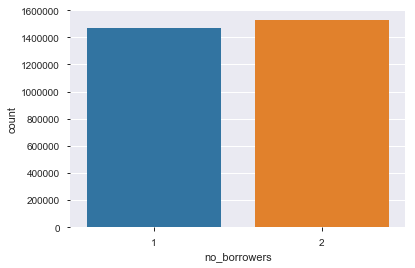

In [31]:
sns.countplot(x='no_borrowers', data=npdf7)

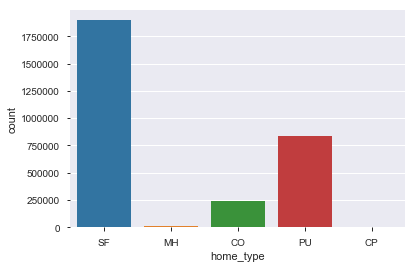

In [33]:

sns.countplot(x='home_type', data=npdf7)

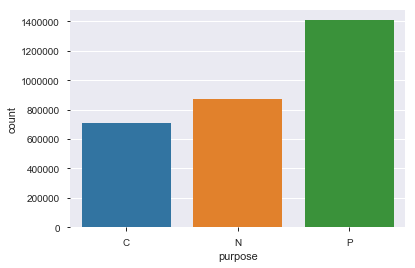

In [37]:
sns.countplot(x='purpose', data=npdf7)

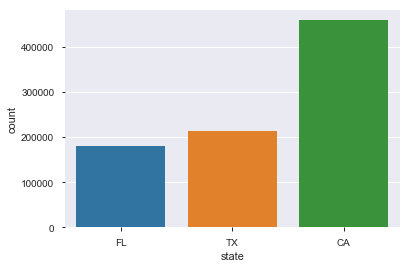

In [39]:
sns.countplot(x='state', data=npdf7.loc[npdf7['state'].isin(['CA','TX','FL'])])

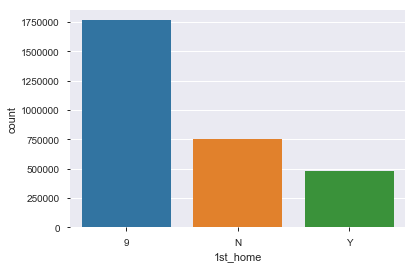

In [47]:
sns.countplot(x='1st_home', data=npdf7)

### Histograms

C:\Users\arpan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


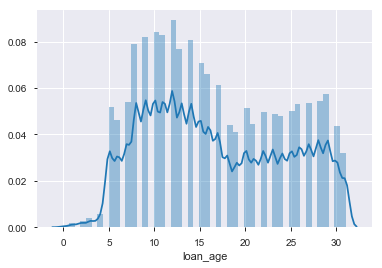

In [40]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(npdf7.loan_age)

C:\Users\arpan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


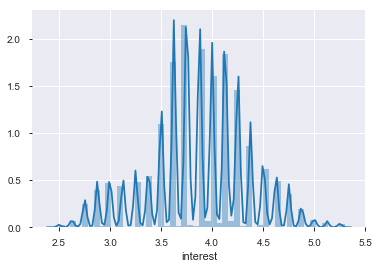

In [43]:
sns.distplot(npdf7.interest)

C:\Users\arpan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


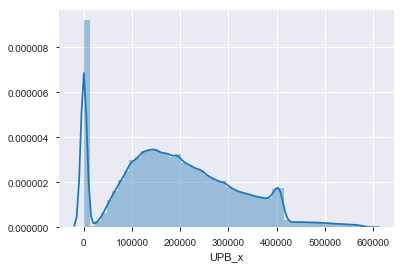

In [46]:
sns.distplot(npdf7.UPB_x)

### Heatmap

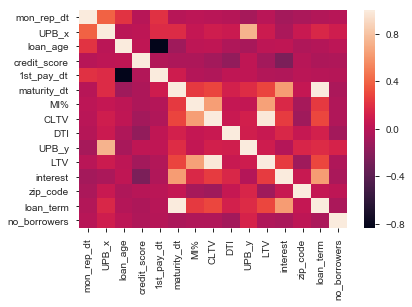

In [45]:
# Calculate correlations
corr = npdf7.drop('num_units', 1).corr()
 
# Heatmap
sns.heatmap(corr)

### Scatterplots

C:\Users\arpan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


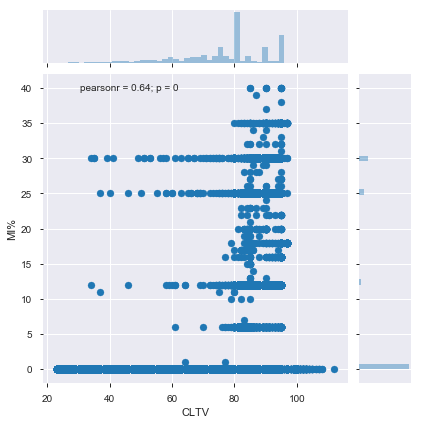

In [49]:
# Joint Distribution Plot
sns.jointplot(x='CLTV', y='MI%', data=npdf7)